In [1]:
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X_train[0].size

784

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_reduced = pca.fit_transform(X_train)

pca.n_components_

154

In [4]:
pca.explained_variance_ratio_

array([0.09752716, 0.07163308, 0.06155039, 0.0540263 , 0.04892907,
       0.04313164, 0.03282833, 0.02897536, 0.0275521 , 0.02351187,
       0.0209492 , 0.02044566, 0.01705018, 0.01690902, 0.01581436,
       0.01483566, 0.01321122, 0.01273728, 0.01182606, 0.01152273,
       0.01066337, 0.01005122, 0.00958033, 0.00910324, 0.00888607,
       0.00838131, 0.00811896, 0.00785597, 0.00740521, 0.00689046,
       0.00656717, 0.00648508, 0.0059982 , 0.00583618, 0.00566758,
       0.00543981, 0.00502934, 0.00486092, 0.0047962 , 0.00467243,
       0.0045585 , 0.00443094, 0.00416238, 0.00395128, 0.00382844,
       0.00375206, 0.0036023 , 0.00349244, 0.00338624, 0.00320745,
       0.00315908, 0.00309778, 0.00297791, 0.00286973, 0.00284104,
       0.00269438, 0.00268084, 0.00255247, 0.00254138, 0.00243962,
       0.00239616, 0.00238092, 0.00229287, 0.00219763, 0.00213498,
       0.00204881, 0.00202194, 0.00195334, 0.00191306, 0.00187819,
       0.00186822, 0.00179689, 0.00176243, 0.00172962, 0.00164

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Extra code for plotting digits
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [6]:
pca = PCA(n_components=154, random_state=42)

X_reduced = pca.fit_transform(X_train)

X_recovered = pca.inverse_transform(X_reduced)



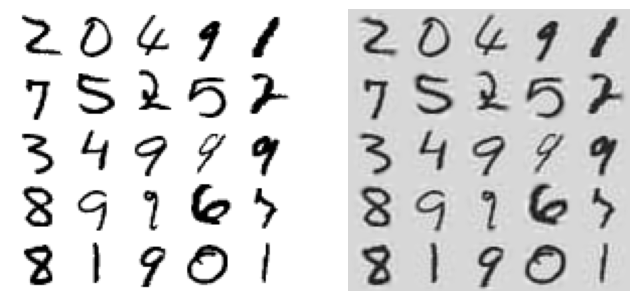

In [7]:
plt.figure(figsize=(8,6))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.show()

In [8]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

lin_pca = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1, fit_inverse_transform=True)




<function matplotlib.pyplot.show(close=None, block=None)>

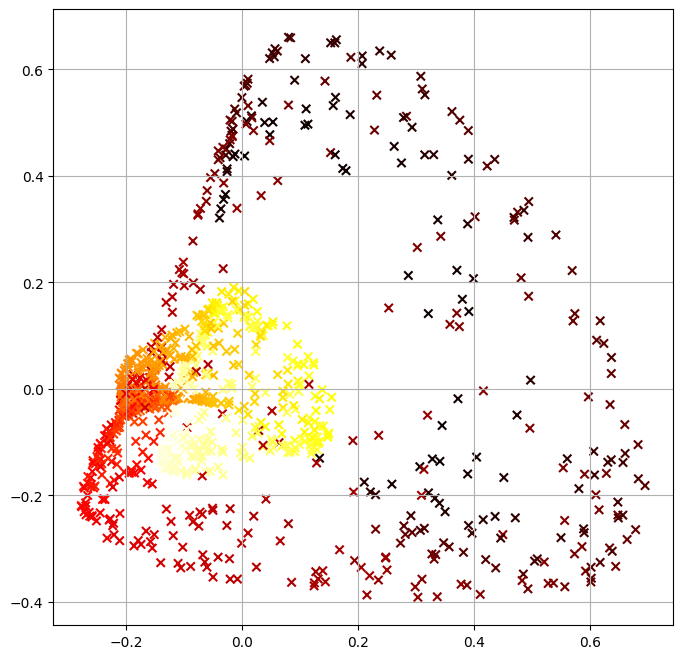

In [9]:
X_reduced = rbf_pca.fit_transform(X)
plt.figure(figsize=(8,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker='x')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

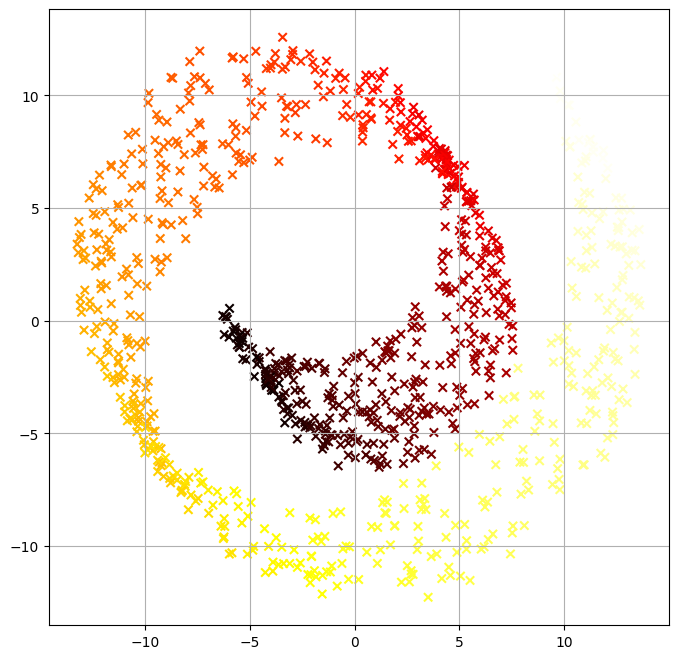

In [10]:
X_reduced = lin_pca.fit_transform(X)
plt.figure(figsize=(8,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker='x')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

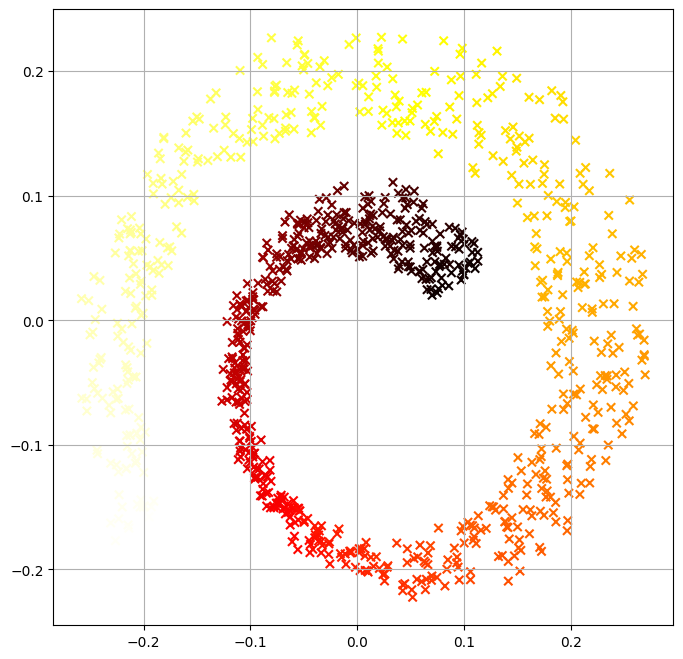

In [11]:
X_reduced = sig_pca.fit_transform(X)
plt.figure(figsize=(8,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker='x')
plt.grid(True)
plt.show

In [15]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)

X_reduced = lle.fit_transform(X)

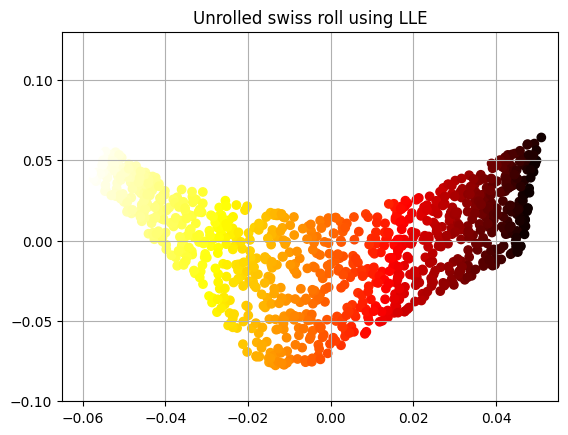

In [16]:
plt.title("Unrolled swiss roll using LLE")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([-0.065, 0.055, -0.1, 0.13])
plt.grid(True)
plt.show()
